# Recogida de datos

## Lectura del CSV

In [733]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [734]:
import pandas as pd


df = pd.read_csv(path+"creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Tratamiento del DataSet

Vamos a recoger todos los fraudes que son cerca a 500 datos, al haber muchísimas filas sin Fraude, recogemos las filas para que el 66% de los datos sean no fraudes y el 33% de fraudes 

33.333333333333336 %
66.66666666666667 %


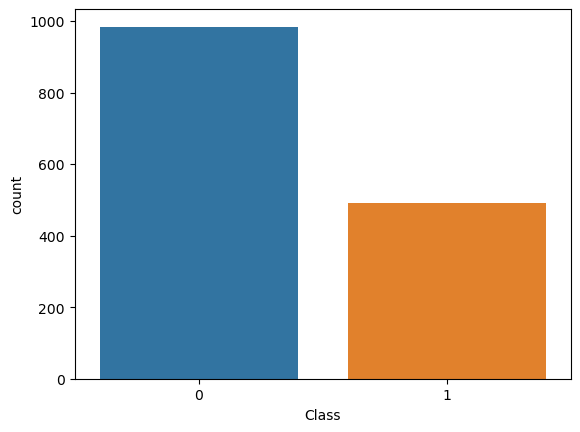

In [735]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

fraude = df[df['Class'] == 1]
no_fraude = df[df['Class'] == 0].sample(int(len(fraude)*2),random_state=42)


df=pd.concat([fraude,no_fraude])
fig,ax=plt.subplots()
sns.countplot(data=df,x='Class')

print(len(fraude)*100/len(df),"%")
print(len(no_fraude)*100/len(df),"%")

# Análisis del DataSet

Vemos que hay numerosas columnas que no tienen relación con Class que es lo que intentamos predecir

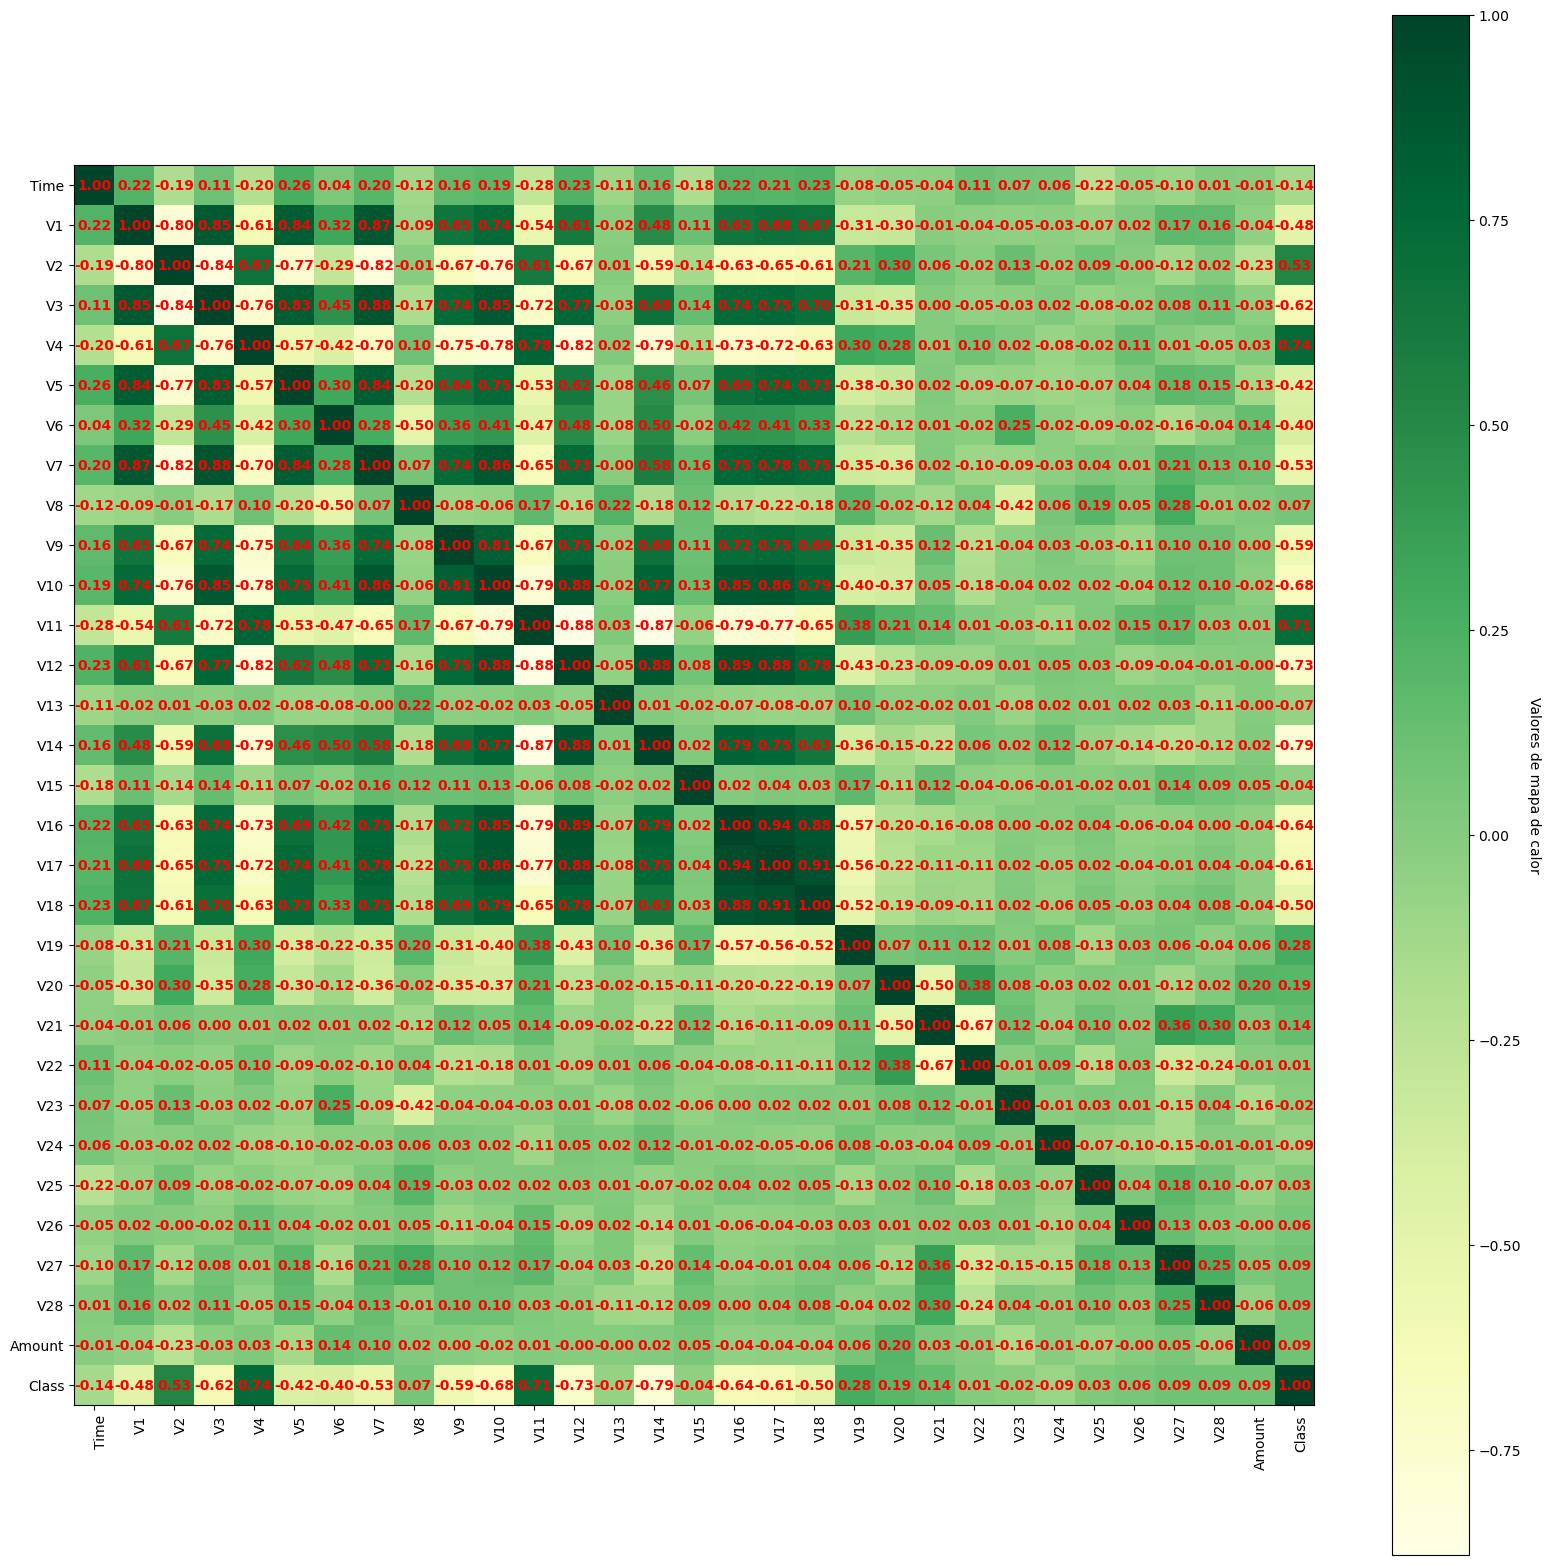

In [736]:
from Clases.Matplot.HeatMap import HeatMap


corr_matrix = df.corr()
HeatMap.heat_map(corr_matrix,corr_matrix.columns,corr_matrix,corr_matrix.columns,corr_matrix.columns,cmap="YlGn",figsize=(20,20),weight="bold",textColor="red")

## Borrar columnas con poca correlación

Borramos del DataSet las columnas con poca correlación que no se comprendan de [0.09 - -0.09]

In [737]:
df=df[corr_matrix[(corr_matrix['Class']>=0.09) | (corr_matrix['Class']<=-0.09)].index]

## Borrar Outliers

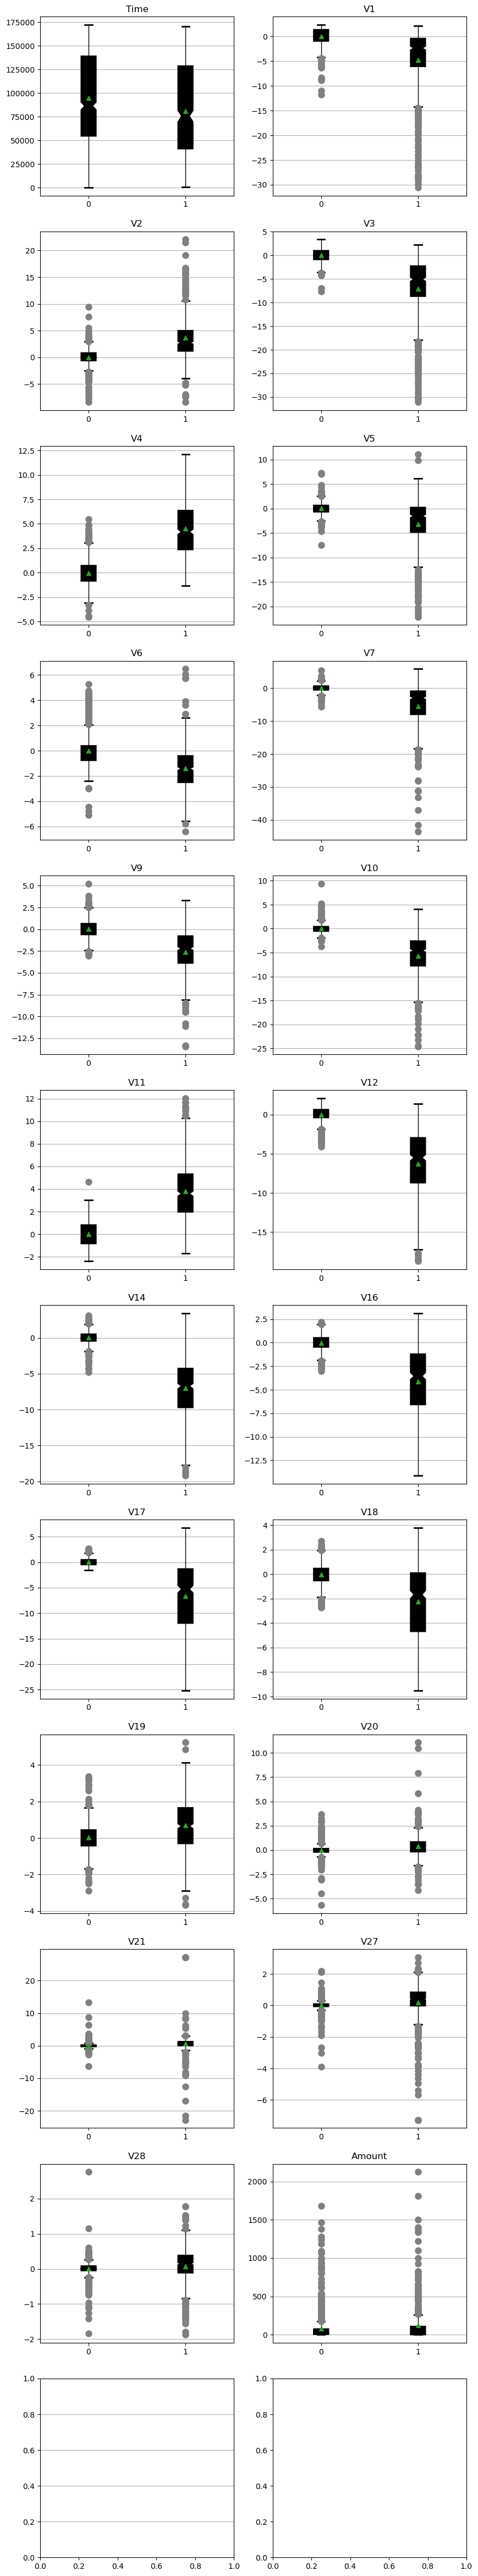

In [738]:
from Clases.Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(df.columns,df,"Class")

In [739]:
def remove_outliers(columns,df):
    df2=df.dropna(subset=columns)
    for j in columns:
        q1 = df2[j].quantile(0.25)
        q3 = df2[j].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df2[j])
        for i in df[j]:
            if i > Upper_tail or i < Lower_tail:
                df[j] = df[j].replace(i, med)
    return df

dfT = df[df["Class"]==0]
dfT = remove_outliers([col for col in dfT.columns if dfT[col].dtype in ['float64','int64']],dfT)

df = pd.concat([dfT,df[df["Class"]==1]])

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_15236\3735200205.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_15236\3735200205.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_15236\3735200205.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_15236\3735200205.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_15236\3735200205.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



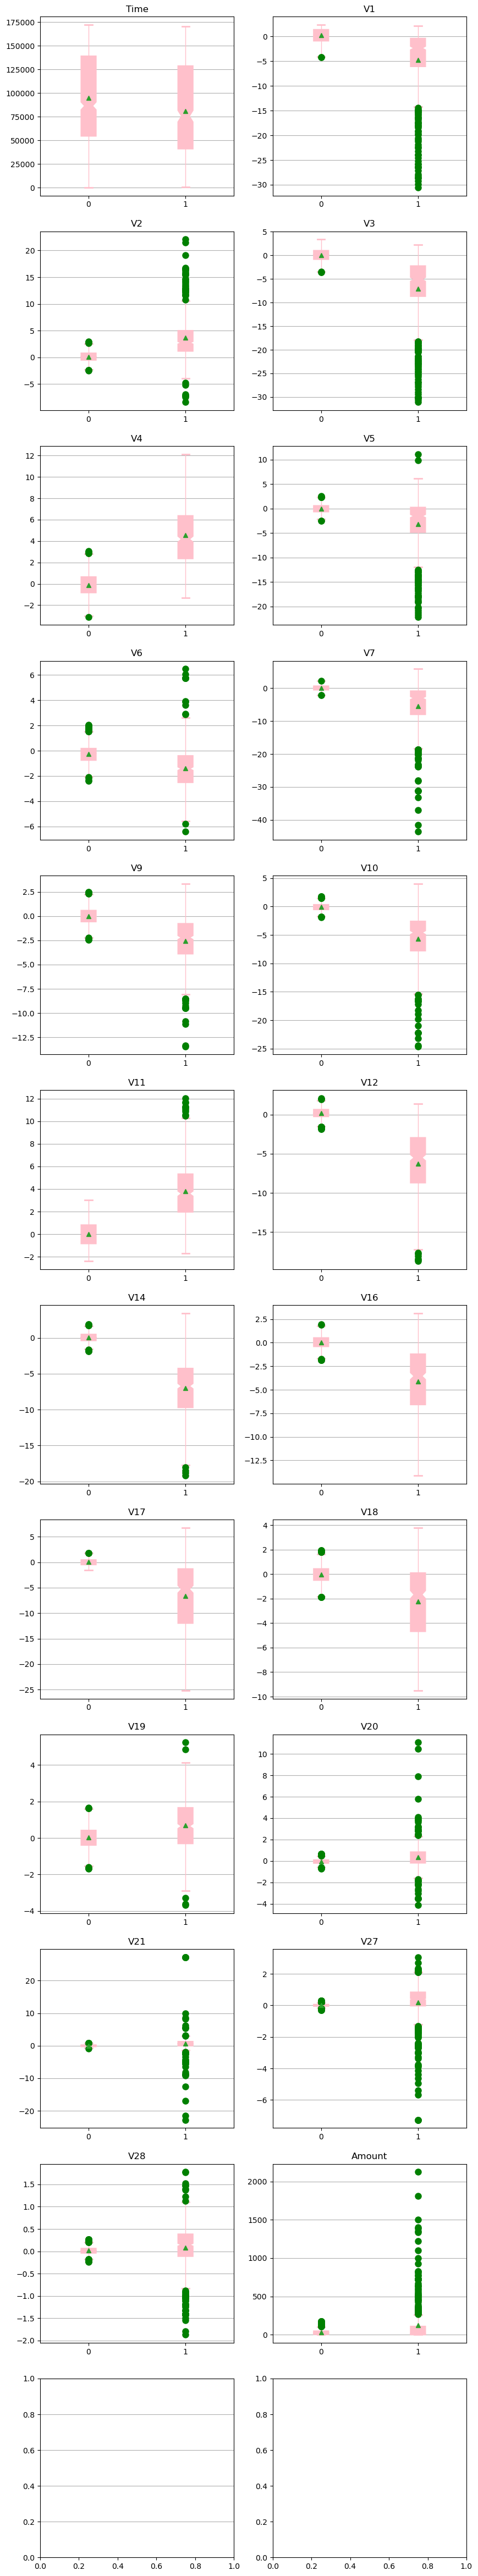

In [740]:
from Clases.Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(df.columns,df,"Class","Pink","Pink","Green","Green")

In [741]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V16,V17,V18,V19,V20,V21,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.132137,-0.597739,...,0.601226,0.631117,0.295078,-0.136151,-0.058040,-0.170307,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,-0.760214,0.170547,...,-0.011633,-0.504570,0.722750,0.861541,-0.081298,0.202287,0.000120,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.043425,-0.099308,...,-0.756390,0.535141,1.016704,0.017392,0.065716,-0.133485,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,-0.149734,-1.238598,...,0.266437,0.703234,0.916719,-0.189967,-0.169706,0.355576,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,-0.024013,0.088062,0.970447,-0.721945,0.683491,1.166335,...,1.317655,-0.441076,0.804104,-1.658339,-0.282777,0.103563,-0.019823,-0.042682,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,-2.064945,-5.587794,...,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,-1.127396,-3.232153,...,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,-0.652250,-3.463891,...,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,-1.632333,-5.245984,...,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,0.884876,-0.253700,245.00,1


# Análisis de los Datos X e Y

Randomizamos el Dataset para embarajar los datos, luego recogeremos las columnas respectivas de X e Y

In [742]:
df=df.sample(frac=1,random_state=42)

In [743]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [744]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V14,V16,V17,V18,V19,V20,V21,V27,V28,Amount
45203,42247.0,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-3.649812,-4.077585,...,-11.583898,-1.461029,0.635694,0.390150,-1.063028,-0.162797,0.027935,0.456023,-0.405682,1.00
263729,161085.0,1.983253,-0.176808,-0.234645,0.420610,-0.524881,-0.517922,-0.426280,1.058515,-0.202975,...,-0.273233,0.055101,-0.504026,-0.429214,-0.206822,-0.145295,-0.152294,0.039992,-0.018518,0.12
116139,74159.0,-1.548788,1.808698,-0.953509,2.213085,-2.015728,-0.913457,-2.356013,-1.678374,-3.538650,...,-3.822894,-2.475359,-5.211875,-0.413872,0.933262,0.390786,0.855138,0.625922,0.395573,76.94
45728,42472.0,1.159605,0.403626,0.523389,2.493116,0.348971,0.832643,-0.052335,-0.344919,0.433379,...,-0.473093,-0.014869,-0.249949,-0.859510,-0.670341,-0.081163,-0.087523,0.031386,0.012514,11.71
124525,77328.0,1.206092,0.413767,0.557591,1.098709,-0.283544,-0.851671,0.217106,-0.159489,-0.065573,...,0.074662,0.169432,-0.558312,-0.498171,-0.301478,-0.029085,-0.207426,0.030902,0.034867,15.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47802,43369.0,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,0.183961,-4.980928,...,-8.509433,-5.369890,-9.069079,-2.819807,0.874543,-0.036837,2.070008,-1.200165,-1.012066,88.00
150684,93888.0,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,-5.731054,-12.438945,...,-8.728645,-14.129855,-20.685028,-8.484449,4.851255,-0.082275,2.823431,-0.307375,0.061631,1.00
88007,61944.0,-2.242599,0.091694,1.335811,0.234568,1.097002,0.989207,-0.325398,0.275580,-0.093656,...,-0.264385,-1.792093,1.365773,0.000094,-1.262710,-0.478782,0.594285,-0.005266,0.011794,10.67
262826,160665.0,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,-4.588536,-6.120715,...,-13.202505,-3.040863,-3.008958,-0.159967,0.788086,0.832035,0.622200,0.821390,0.372379,0.77


# Manejo de datos con PCA

Vemos cuanto tiempo le lleva en tratar los datos al PCA y estandarizarlos

In [745]:
import time
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler


t0 = time.time()

scaler = StandardScaler()
X_orig = scaler.fit_transform(X)
X_reduced_pca = PCA(n_components=0.95).fit_transform(X_orig)
t1 = time.time()
print("PCA le llevó {:.2} s".format(t1 - t0))

PCA le llevó 0.021 s


## Plots de los datos

Vemos que el pca deja reflejado con las dos columnas más importantes que sería bueno dividirlo en 3 Clusters pero vamos a ver

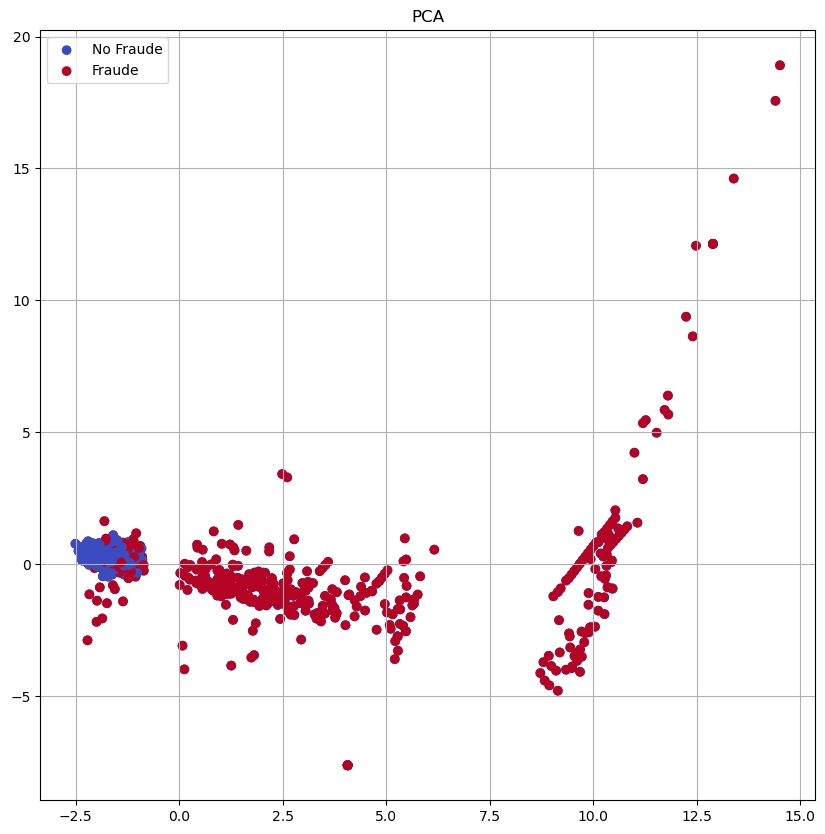

In [746]:
fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==0),label="No Fraude",linewidth=1,cmap="coolwarm")
ax.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==1),label="Fraude",linewidth=1,cmap="coolwarm")
ax.set_title("PCA")
ax.grid(True)

ax.legend()

## KMeans

Para probar entrenaremos a un KMeans con 5 clusters para probar

In [747]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5,random_state=42,init="k-means++")
data = kmeans.fit(X_reduced_pca[:,:2])
data

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

Vamos a ver como se dibuja con los diferentes colores

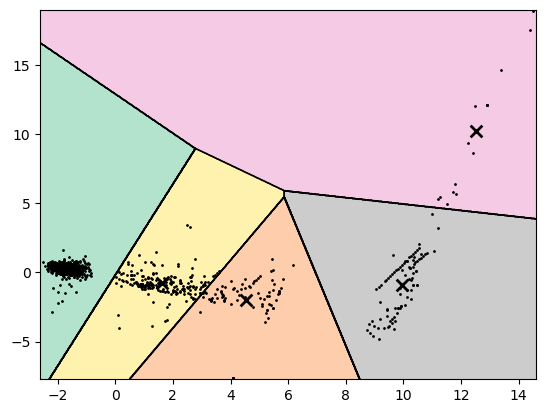

In [748]:
import numpy as np


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)


plot_decision_boundaries(kmeans,X_reduced_pca[:,:2])

Tras esto vemos la inertia de los Clusters para ver como afecta cada Cluster al dibujo

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

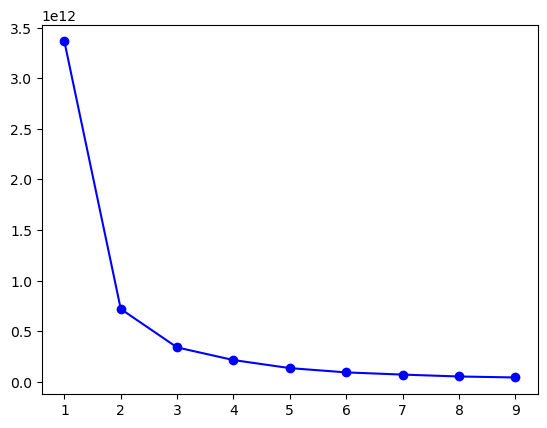

In [749]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")

Ahora con el Score para ver los Clusters más importantes

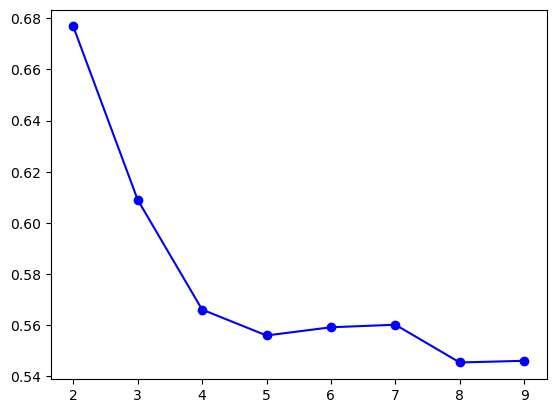

In [750]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

Con el cuchillo vemos que todos cumplen que lleguen a la media y que además están bien distribuidos por lo que esta gráfica no delata mucho

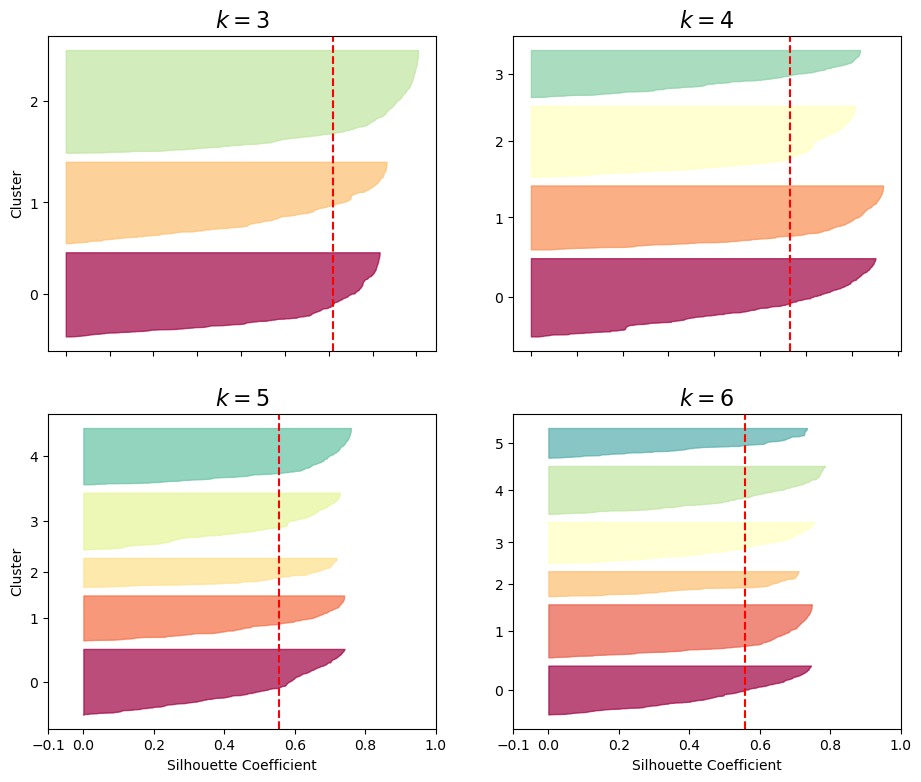

In [751]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


## Conclusión Clustering

Tendriamos varias opciones pero las más viables a mi parecer sería usar 2 o 3 Clusters por los gráficos con picos proporcionados anteriormente y los cuchillos de anterioridad 

<li>En la primera gráfica observamos que a partir del 3º Cluster empieza a decaer la necesidad de más Clusters</li>
<li>En la segunda vemos que dos clusters y tres son </li>

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



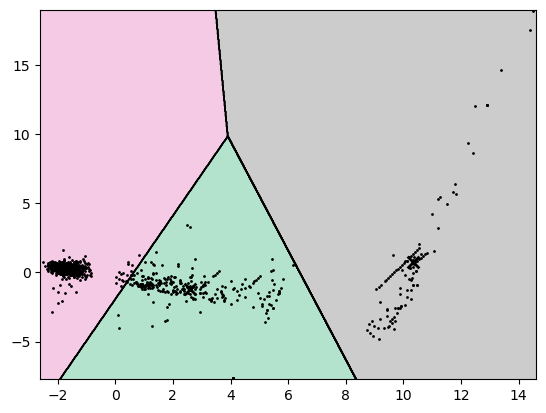

In [752]:
import numpy as np


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)



kmeans = KMeans(n_clusters=3,random_state=42,init="k-means++")
data = kmeans.fit(X_reduced_pca[:,:2])
plot_decision_boundaries(kmeans,X_reduced_pca[:,:2])

# Manejo de datos Pre-Entreno

## División de datos

In [753]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## Pruebas SMOTE

*Relleno de datos de los train*

No sale rentable ya que el Score de los datos generados es menor a los resultados actuales tras el entrenamiento

In [754]:
#!pip install imblearn
#!pip install -U threadpoolctl

In [755]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 4) 
X_train,y_train=sm.fit_resample(X_train, y_train.ravel()) 

# Predicción de Modelos

In [756]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = {
    "SGDClassifier":SGDClassifier('log_loss'),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    #'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

## Gráficos de modelos con Accuracy y Cross_Score

Recorremos los modelos y vemos el Accuracy que tiene el propio modelo y el Cross_val_score de los resultados actuales para comparar los mejores modelos

In [757]:

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    X_train_contiguous = np.ascontiguousarray(X_train)
    X_test_contiguous = np.ascontiguousarray(X_test)
    model.fit(X_train_contiguous, y_train)
    y_pred = model.predict(X_test_contiguous)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    training_score = cross_val_score(model, X_train, y_train, cv=5)
    print(f"\t{name} Cross_Score: {round(training_score.mean(),2)*100}","%")

SGDClassifier Accuracy: 0.33
	SGDClassifier Cross_Score: 50.0 %
Logistic Regression Accuracy: 0.94
	Logistic Regression Cross_Score: 95.0 %
Decision Tree Accuracy: 0.97
	Decision Tree Cross_Score: 97.0 %
Random Forest Accuracy: 0.99


	Random Forest Cross_Score: 98.0 %
SVM Accuracy: 0.51
	SVM Cross_Score: 54.0 %
Gradient Boosting Accuracy: 0.99
	Gradient Boosting Cross_Score: 98.0 %
XGBoost Accuracy: 0.98
	XGBoost Cross_Score: 98.0 %
AdaBoost Accuracy: 0.96
	AdaBoost Cross_Score: 97.0 %
Naive Bayes Accuracy: 0.94
	Naive Bayes Cross_Score: 91.0 %
MLP Neural Network Accuracy: 0.76
	MLP Neural Network Cross_Score: 70.0 %


Dibujamos las gráficas de los modelos para ver quienes tienen las mejores areas siendo:

<li style="Color:pink">XGBoost</li>
<li style="Color:red">Random Forest</li>

Siendo RandomForest el elegido principalmente por los parámetros permitidos del modelo para realizar una Hiper-parametrización

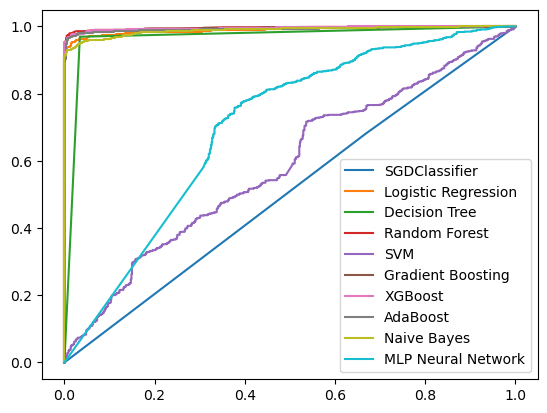

In [758]:
from sklearn.calibration import cross_val_predict
from sklearn.metrics import roc_curve


for name, model in models.items():
    y_probas = cross_val_predict(model, X_train, y_train, cv=3,
                                    method="predict_proba")
    y_scores = y_probas[:, 1]
    fpr, tpr, thresholds_forest = roc_curve(y_train, y_scores, pos_label=1,drop_intermediate=True)
    plt.plot(fpr, tpr, label=name)
    plt.legend()

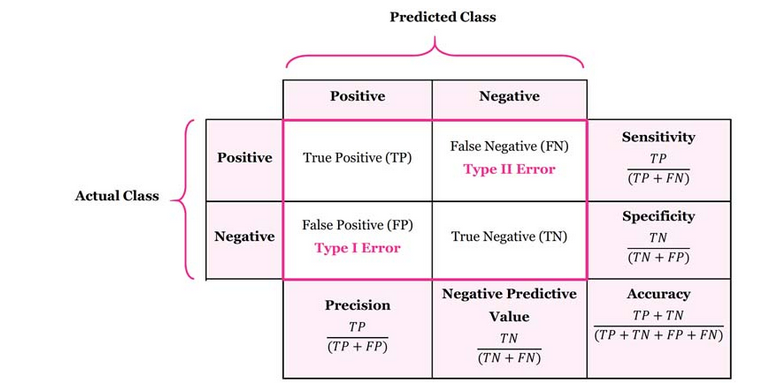

## Hiper-Parametrización del modelo seleccionado: 

### <i><b>RandomForest</b></i>

In [759]:
import optuna

import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb


def objective(trial):
    
    param = {
        #'tree_method':'hist',  # this parameter means using the GPU when training our mode
        #'max_depth': trial.suggest_int('max_depth', 1, 8),
        #'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        #'n_estimators': trial.suggest_int('n_estimators', 50, 350),
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        #'gamma': trial.suggest_float('gamma', 0.35, 1.0),
        #'subsample': trial.suggest_float('subsample', 0.01, 0.9),
        #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        #'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 0.85),
        #'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        #'eval_metric': 'mlogloss',
        'n_estimators' : trial.suggest_int("n_estimators", 10, 200, log=True),
        'max_depth' : trial.suggest_int("max_depth", 2, 32),
        'min_samples_split' :trial.suggest_int("min_samples_split", 2, 10),
        'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 10),
        'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return precision_score(y_test,y_pred)*0.3+recall_score(y_test,y_pred)*0.7


#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=150,show_progress_bar=True)

#study.best_params



### Evolución del modelo de optuna

Vemos como el modelo va evolucionando a medida que recorremos las pruebas con Optuna siendo el mejor modelo en el punto 3X

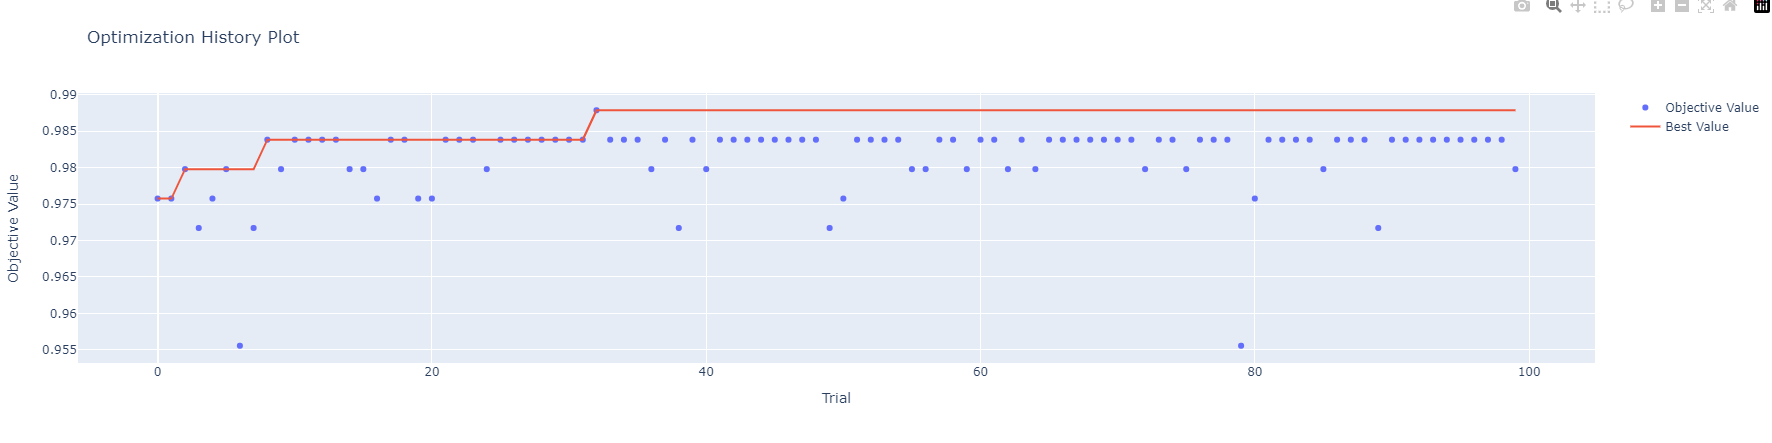

In [760]:
#optuna.visualization.plot_optimization_history(study)

Vemos los parametros en las últimas puebras siendo de más oscuras cuanto más cerca a las pruebas finales son

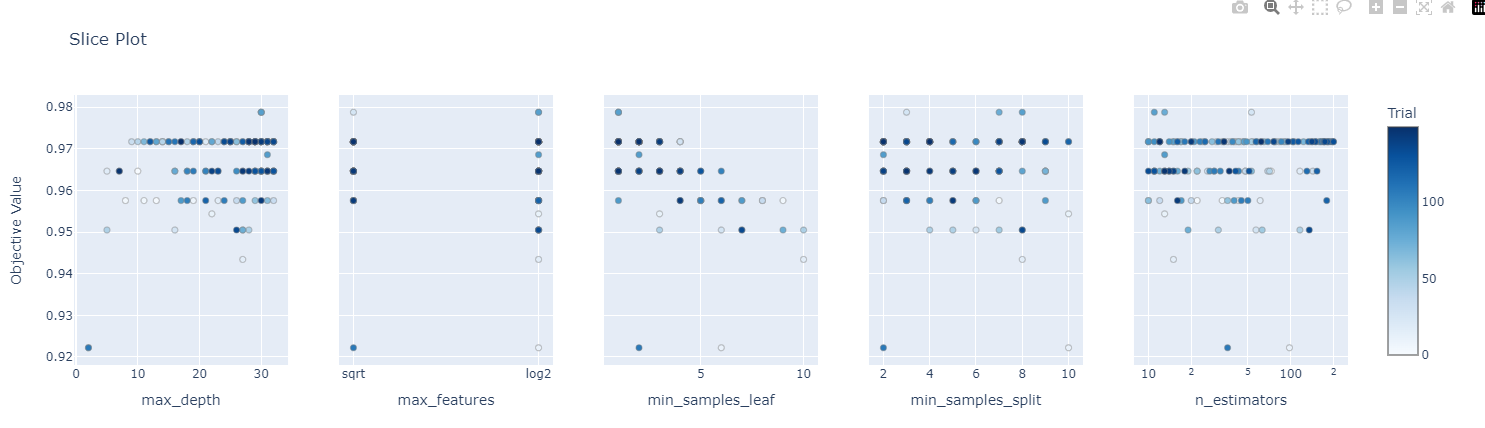

In [761]:
#optuna.visualization.plot_slice(study)

Y vemos que estos parámetros son de los mejores para el modelo en esta altura

In [762]:
#params = {'max_depth': 8,
# 'learning_rate': 0.282727256138421,
# 'n_estimators': 168,
# 'min_child_weight': 5,
# 'gamma': 0.9066109558463217,
# 'subsample': 0.5865025789684437,
# 'colsample_bytree': 0.7463794277983449,
# 'reg_alpha': 0.5501565887096028,
# 'reg_lambda': 0.2720110643925889}


params = {'n_estimators': 53,
 'max_depth': 30,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

#params = study.best_params

## Predicción de modelos

In [763]:
import xgboost


model = RandomForestClassifier(**params)
#model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=3, n_estimators=53)

Vemos cual es el Recall Score y el Precision Score siendo precision score cerca o igual del 1.0 y el recall con 0.8^ 

In [764]:
from sklearn.metrics import precision_score, r2_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

datos_prueba =  X_test
y_pred = model.predict(datos_prueba)
y_reales = y_test
print("SCORE:",model.score(X_test,y_test))
print("R2 SCORE:",r2_score(y_test, y_pred))

#model_score = cross_val_score(model, X_train, y_train,
#                            scoring = "neg_mean_squared_error", cv=3)
#root_lin_score = np.sqrt(-model_score)
predicciones=model.predict(X_test)

#mse = mean_squared_error(y_test, predicciones)
#mse = np.sqrt(mse)
#mae = mean_absolute_error(y_test, predicciones)

print("PRECISION SCORE",precision_score(y_test,predicciones))
print("RECALL SCORE",recall_score(y_test,predicciones))


SCORE: 0.9864864864864865
R2 SCORE: 0.9392913910680408
PRECISION SCORE 1.0
RECALL SCORE 0.9595959595959596


# Matriz de confusión

In [765]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_reales, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falso Positivos (FP): {fp}")
print(f"Falso Negativos (FN): {fn}")

Verdaderos Positivos (TP): 95
Verdaderos Negativos (TN): 197
Falso Positivos (FP): 0
Falso Negativos (FN): 4


<li><span style="Color:#90ee90">Verdaderos negativos</span> >> <b>Arriba a la izquierda</b> >> <i style="Color:#90ee90">No Fraude</i></li>
<li><span style="Color:red">Falsos negativos</span> >> <b>Arriba a la derecha</b> >> <i style="Color:#90ee90">No Fraude</i></li>
<li><span style="Color:red">Falsos positivos</span> >> <b>Abajo a la izquierda</b> >> <i style="Color:red">Fraude</i></li>
<li><span style="Color:#90ee90">Verdaderos positivos</span> >> <b>Abajo a la derecha</b> >> <i style="Color:red">Fraude</i></li>

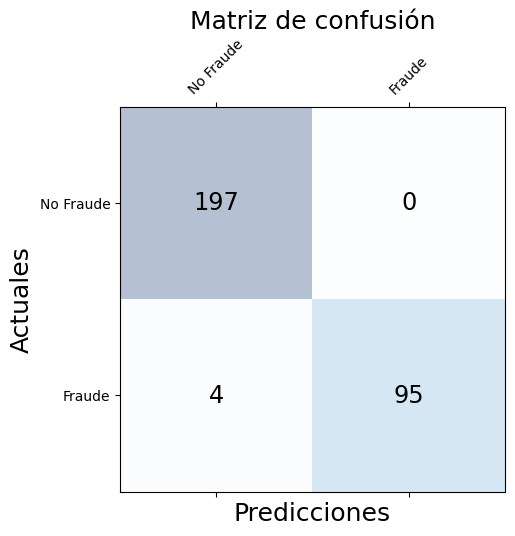

In [766]:
def draw_matrix(matrix):
    _, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(matrix, cmap='Blues', alpha=0.3)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicciones', fontsize=18)
    plt.ylabel('Actuales', fontsize=18)
    plt.title('Matriz de confusión', fontsize=18)
    lista = ['No Fraude','Fraude']
    tick_marks = np.arange(len(lista))
    plt.xticks(tick_marks, lista, rotation=45)
    plt.yticks(tick_marks, lista)
    plt.show()

draw_matrix(conf_matrix)

Vemos que el modelo de cada casi 300 valores falla de media un equivalente a 11 valores que no es nada mal, siendo 0 los Fraudes que el detecta pero no lo son